In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

 99% 1.06G/1.06G [00:07<00:00, 122MB/s]
100% 1.06G/1.06G [00:07<00:00, 143MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten

In [ ]:
#generators
train_ds = keras.utils.image_dataset_from_directory(
    directory ='/content/train',
    labels="inferred",
    label_mode="int",
    batch_size = 32,
    image_size=(256,256)
)


validation_ds = train_ds = keras.utils.image_dataset_from_directory(
    directory ='/content/test',
    labels="inferred",
    label_mode="int",
    batch_size = 32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
#Normalize

def process(image,label):
  image = tf.cast(image/255. ,tf.float32)
  return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [ ]:
#create cnn model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3) , padding ='valid',activation='relu' , input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3), padding ='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3), padding ='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 128)       0

In [ ]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy' , metrics= ['accuracy'])

In [ ]:
history = model.fit(train_ds, epochs = 10, validation_data = validation_ds)

Epoch 1/10
157/157 [==============================] - 26s 116ms/step - loss: 0.7149 - accuracy: 0.5100 - val_loss: 0.6841 - val_accuracy: 0.5832
Epoch 2/10
157/157 [==============================] - 18s 115ms/step - loss: 0.6477 - accuracy: 0.6154 - val_loss: 0.5850 - val_accuracy: 0.6990
Epoch 3/10
157/157 [==============================] - 18s 112ms/step - loss: 0.5804 - accuracy: 0.7002 - val_loss: 0.5909 - val_accuracy: 0.6746
Epoch 4/10
157/157 [==============================] - 21s 133ms/step - loss: 0.5120 - accuracy: 0.7502 - val_loss: 0.4200 - val_accuracy: 0.7996
Epoch 5/10
157/157 [==============================] - 18s 111ms/step - loss: 0.4371 - accuracy: 0.7996 - val_loss: 0.3374 - val_accuracy: 0.8534
Epoch 6/10
157/157 [==============================] - 19s 119ms/step - loss: 0.3209 - accuracy: 0.8558 - val_loss: 0.2805 - val_accuracy: 0.8770
Epoch 7/10
157/157 [==============================] - 17s 109ms/step - loss: 0.1957 - accuracy: 0.9236 - val_loss: 0.2561 - val_ac

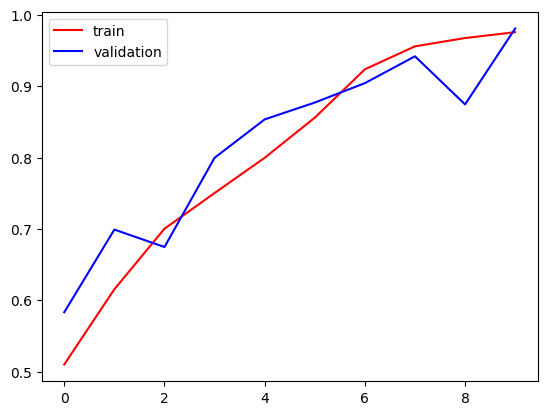

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color = 'red', label = 'train')
plt.plot(history.history['val_accuracy'], color = 'blue', label = 'validation')
plt.legend()
plt.show()

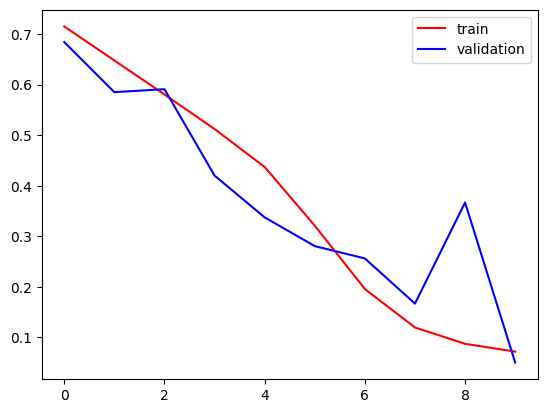

In [ ]:
plt.plot(history.history['loss'],color = 'red', label = 'train')
plt.plot(history.history['val_loss'], color = 'blue', label = 'validation')
plt.legend()
plt.show()

In [ ]:
import cv2

In [ ]:
test_img = cv2.imread('/content/dog.jpeg')

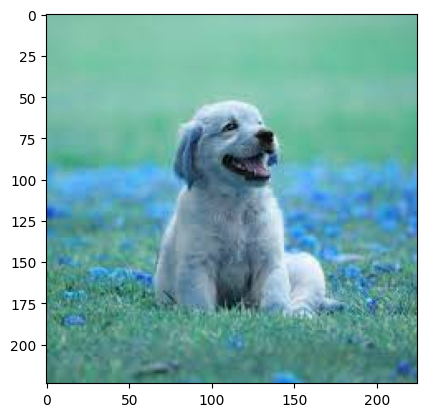

In [ ]:
plt.imshow(test_img)

In [ ]:
test_img.shape

(224, 225, 3)

In [ ]:
test_img = cv2.resize(test_img,(256,256))

In [ ]:
test_input = test_img.reshape((1,256,256,3))

In [ ]:
model.predict(test_input)

1/1 [==============================] - 1s 505ms/step


array([[1.]], dtype=float32)

In [ ]:
test_img = cv2.imread('/content/cat.jpeg')


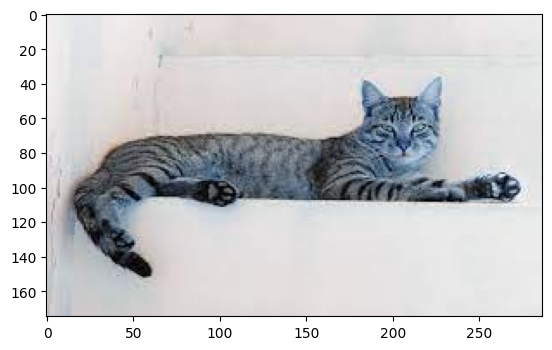

In [ ]:
plt.imshow(test_img)

In [ ]:
test_img.shape

(175, 287, 3)

In [ ]:
test_img = cv2.resize(test_img,(256,256))
test_input = test_img.reshape((1,256,256,3))

In [ ]:
model.predict(test_input)

1/1 [==============================] - 0s 18ms/step


array([[0.]], dtype=float32)